<a href="https://colab.research.google.com/github/ttb-git/Berkeley-Engr-PracticalAssignment3/blob/main/Practical_Application_III_TB_1_FeatureEngr_Modelling_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



###Understanding the Features

```
Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Attribute Information:

### Bank client data:
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

###Related with the last contact of the current campaign:

* Contact: contact communication type (categorical: 'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###Other attributes:
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* Emp.var.rate: employment variation rate - quarterly indicator (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')
'''


In [193]:
# Importing modules and libraries
%matplotlib inline
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Berkeley-Engineering-Projects/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


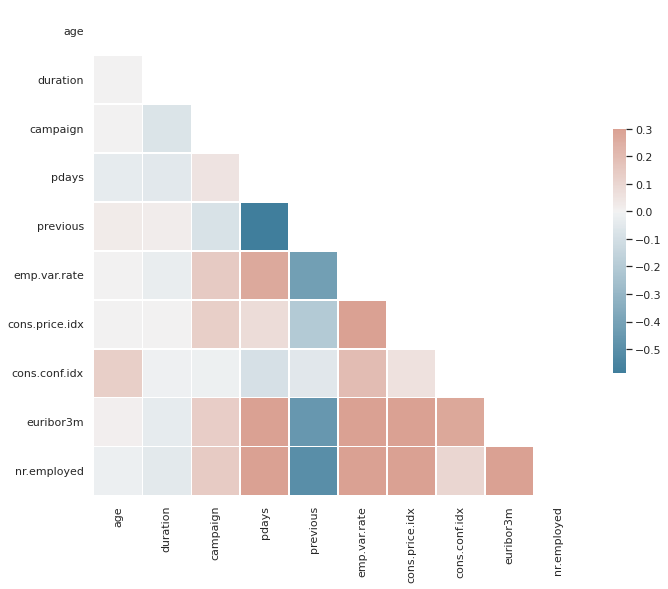

In [196]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

# Computing the correlation matrix
corr = data.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [197]:
#Let's drop the duplicate values first
data = data.drop_duplicates()
data.shape

(41176, 21)

####Dealing with Missing Data and Duplicate Values


In [198]:
# Checking for Null Values
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

We have no null values!

###I am going to select bank information features (columns 1 - 7) and prepare the features and target column for modeling with appropriate encoding and transformations.


In [199]:
df_feature = data.iloc[: , 0:7]
df_feature.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


###Encoding Categorical deatures
Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling that will be applied later.

In [200]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_feature['job']      = labelencoder_X.fit_transform(df_feature['job']) 
df_feature['marital']  = labelencoder_X.fit_transform(df_feature['marital']) 
df_feature['education']= labelencoder_X.fit_transform(df_feature['education']) 
df_feature['default']  = labelencoder_X.fit_transform(df_feature['default']) 
df_feature['housing']  = labelencoder_X.fit_transform(df_feature['housing']) 
df_feature['loan']     = labelencoder_X.fit_transform(df_feature['loan']) 

In [201]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df_feature);

In [202]:
print(df_feature.shape)

(41176, 7)


In [203]:
X = df_feature
X.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [204]:
data.apply(lambda x: len(x.unique()), axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

###Normalizig the Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [205]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [206]:
y.info()
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ['y']_yes  41176 non-null  uint8
dtypes: uint8(1)
memory usage: 361.9 KB
(41176, 1)


In [207]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.38828682, -0.20147477, -0.28370335, -1.7537527 , -0.51365651,
        -1.087787  , -0.45257005],
       [ 1.38828682,  0.9113627 , -0.28370335, -0.34959564,  1.94511127,
        -1.087787  , -0.45257005],
       [ 0.0290815 ,  0.9113627 , -0.28370335, -0.34959564, -0.51365651,
         0.94206515, -0.45257005],
       [ 0.0290815 , -1.03610287, -0.28370335, -1.28570035, -0.51365651,
        -1.087787  , -0.45257005],
       [ 1.38828682,  0.9113627 , -0.28370335, -0.34959564, -0.51365651,
        -1.087787  ,  2.31104027]])

In [208]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

##Classification

In [209]:
# Separate into train and test sets
from sklearn.model_selection import train_test_split

# Separate train and test sets in a balanced way
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify= y)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#print(f'\n\n{features_train[0]}\n\n')

unique, counts = np.unique(y, return_counts=True)
print(f'Total set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(y_train, return_counts=True)
print(f'Train set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(y_test, return_counts=True)
print(f'Test set distribution: {dict(zip(unique, counts))}')

Train set: (34999, 7) (34999, 1)
Test set: (6177, 7) (6177, 1)
Total set distribution: {0: 36537, 1: 4639}
Train set distribution: {0: 31056, 1: 3943}
Test set distribution: {0: 5481, 1: 696}


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [225]:
import time
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
# Initial simple model with logistic regression
start_time = time.time()##

lgr = LogisticRegression(C=0.001)
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
lgr.score(X_test, y_test)

# Evaluate Model
lgr_eval = evaluate_model(lgr, X_test, y_test)

end_time = time.time()##

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we see above, the AUC score is 0.62.

In [227]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', lgr_eval['acc'])
print('Precision:', lgr_eval['prec'])
print('Recall:', lgr_eval['rec'])
print('F1 Score:', lgr_eval['f1'])
print('Cohens Kappa Score:', lgr_eval['kappa'])
print('Area Under Curve:', lgr_eval['auc'])
print('Confusion Matrix:\n', lgr_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.20072579383850098
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6216454124698279
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Problem 8: A Simple Model
Use Logistic Regression to build a basic model on your data.

### A Simple model

I will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data first.

In [229]:
# Initial simple model with logistic regression
start_time = time.time()##

lr = LogisticRegression(C=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

end_time = time.time()##

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.06512236595153809
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6216454124698279
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

### Problem 9: Score the Model

What is the accuracy of your model?

In [230]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

start_time = time.time()##

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

end_time = time.time()##

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177


Run time for baseline model :  0.019886016845703125
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6216454124698279
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5481
           1       0.00      0.00      0.00       696

    accuracy                           0.89      6177
   macro avg       0.44      0.50      0.47      6177
weighted avg       0.79      0.89      0.83      6177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

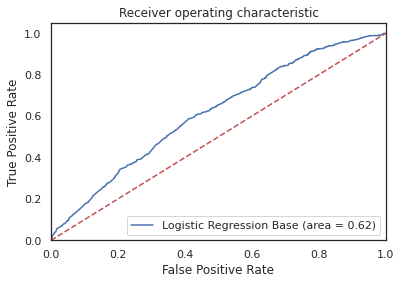

In [232]:
# Plotting
probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

## KNN

In [233]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()##

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Evaluate Model
knn_eval = evaluate_model(nb, X_test, y_test)

end_time = time.time()##


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  0.47370338439941406
Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6171741145482723
Confusion Matrix:
 [[5481    0]
 [ 696    0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5481
           1       0.32      0.05      0.09       696

    accuracy                           0.88      6177
   macro avg       0.60      0.52      0.51      6177
weighted avg       0.83      0.88      0.84      6177



We got a classification rate of 88%,  It is considered as good accuracy.

For further evaluation, you we will create a model for a different number of neighbors later.

## Decision Tree

In [235]:
from sklearn import tree

start_time = time.time()##
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [236]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

end_time = time.time()##

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  3.8306353092193604
Accuracy: 0.8831147806378501
Precision: 0.2903225806451613
Recall: 0.02586206896551724
F1 Score: 0.0474934036939314
Cohens Kappa Score: 0.029606633097338575
Area Under Curve: 0.6213262587370793
Confusion Matrix:
 [[5437   44]
 [ 678   18]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5481
           1       0.32      0.05      0.09       696

    accuracy                           0.88      6177
   macro avg       0.60      0.52      0.51      6177
weighted avg       0.83      0.88      0.84      6177



## Support Vector Machines

In [237]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced').fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
start_time = time.time()##

svc_train_preds = svc.predict(X_train)
svc_test_preds = svc.predict(X_test)

# Evaluate Model
svc_eval = evaluate_model(nb, X_test, y_test)

end_time = time.time()##

# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Cohens Kappa Score:', svc_eval['kappa'])
print('Area Under Curve:', svc_eval['auc'])
print('Confusion Matrix:\n', svc_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  79.3965015411377
Accuracy: 0.8844099077221952
Precision: 0.17857142857142858
Recall: 0.007183908045977011
F1 Score: 0.013812154696132596
Cohens Kappa Score: 0.005141690870554827
Area Under Curve: 0.6226834812843532
Confusion Matrix:
 [[5458   23]
 [ 691    5]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5481
           1       0.28      0.04      0.07       696

    accuracy                           0.88      6177
   macro avg       0.59      0.51      0.50      6177
weighted avg       0.82      0.88      0.84      6177



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
start_time = time.time()##
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

end_time = time.time()##

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [185]:
# Print result

print("\nRun time for baseline model : ", end_time-start_time)
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

print(metrics.classification_report(y_test, y_pred))


Run time for baseline model :  1.6976993083953857
Accuracy: 0.8848955803788247
Precision: 0.25806451612903225
Recall: 0.011494252873563218
F1 Score: 0.02200825309491059
Cohens Kappa Score: 0.012519316914770928
Area Under Curve: 0.6245066551745109
Confusion Matrix:
 [[5458   23]
 [ 688    8]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5481
           1       0.28      0.04      0.07       696

    accuracy                           0.88      6177
   macro avg       0.59      0.51      0.50      6177
weighted avg       0.82      0.88      0.84      6177



In [187]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [238]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8873239436619719
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.6171741145482723
Confusion Matrix:
 [[5481    0]
 [ 696    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Comparison

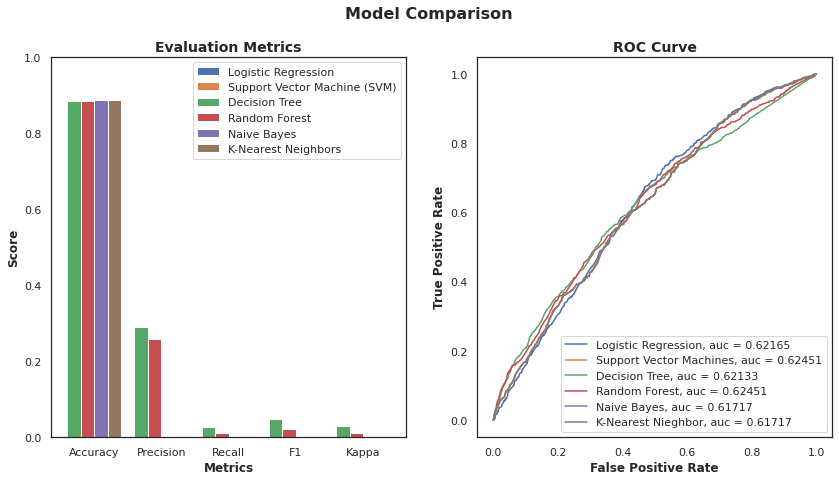

In [242]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2

lgr_score = [lgr_eval['acc'], lgr_eval['prec'], lgr_eval['rec'], lgr_eval['f1'], lgr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1'], svc_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r3, lgr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, svc_score, width=barWidth, edgecolor='white', label='Support Vector Machine (SVM)')
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

ax2.plot(lgr_eval['fpr'], lgr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lgr_eval['auc']))
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label='Support Vector Machines, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric